## Importing Libraries & Data

In [29]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [30]:
# read data
data = pd.read_csv('data/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Explore Data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [32]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [33]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [34]:
data.describe(include='O').transpose()

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


<AxesSubplot:>

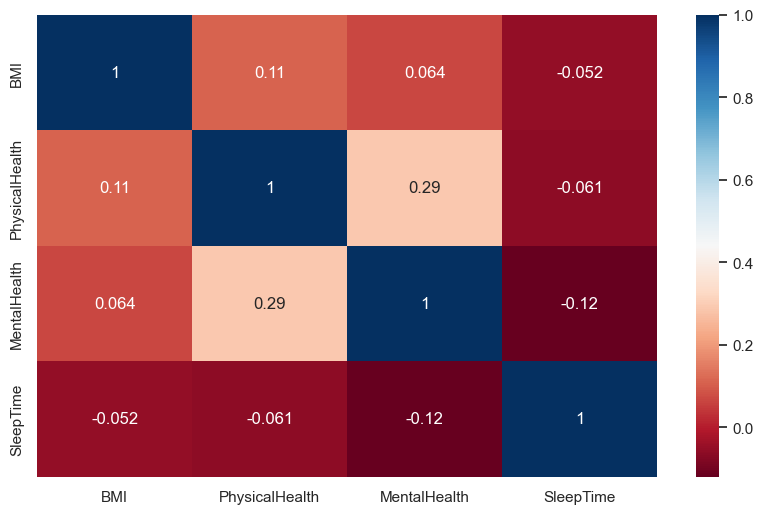

In [35]:
#data correlation
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(),annot=True,cmap='RdBu')

## Check Null Values

In [36]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [37]:
#all rows control for null values
data.isna().values.any()

False

## Duplicated values

In [38]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


## Data Analysis & Visualization

In [39]:
# check how many people have  HeartDisease or not
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

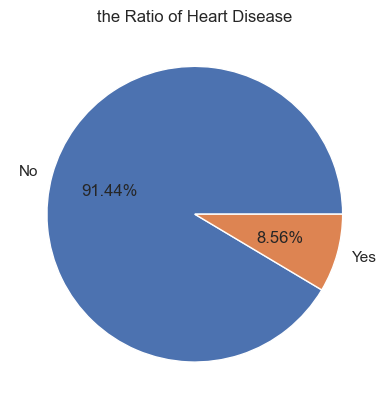

In [40]:
#show Ratio of HeartDisease from data
plt.pie(x = data['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=data['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

In [41]:
#how many of Male and female
data['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

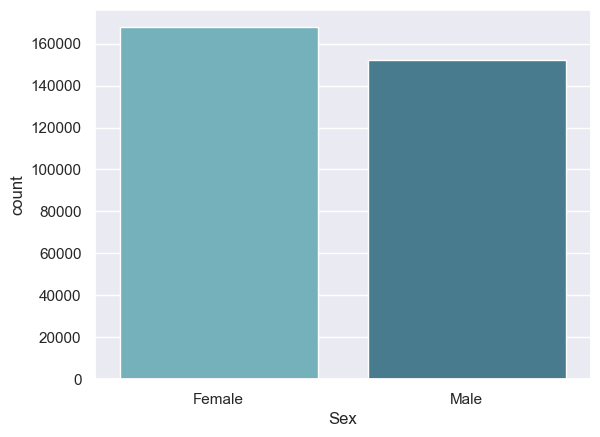

In [42]:
#show how many of Male and female 
sns.countplot(x = data['Sex'], palette='GnBu_d')

In [43]:
data.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              156571
        Yes              11234
Male    No              135851
        Yes              16139
Name: HeartDisease, dtype: int64

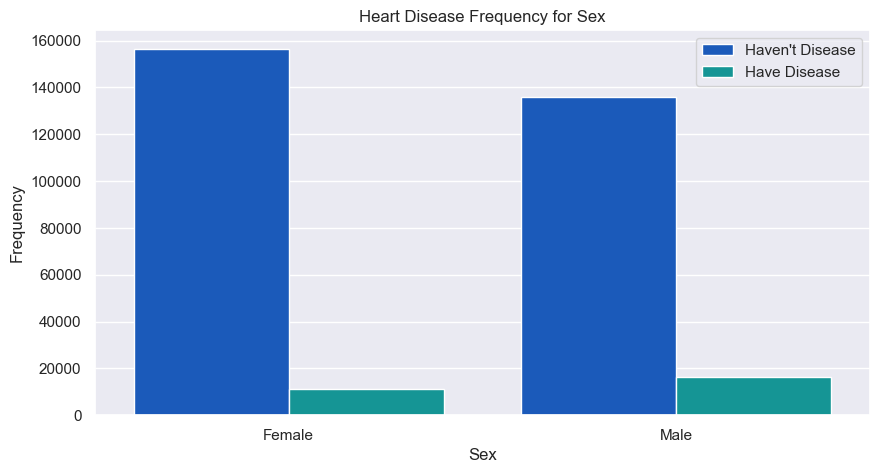

In [44]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = data['Sex'], data=data, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [45]:
#AgeCategory frequency
data['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [46]:
data.groupby(['AgeCategory','HeartDisease'])['HeartDisease'].count()

AgeCategory  HeartDisease
18-24        No              20934
             Yes               130
25-29        No              16822
             Yes               133
30-34        No              18527
             Yes               226
35-39        No              20254
             Yes               296
40-44        No              20520
             Yes               486
45-49        No              21047
             Yes               744
50-54        No              23999
             Yes              1383
55-59        No              27555
             Yes              2202
60-64        No              30359
             Yes              3327
65-69        No              30050
             Yes              4101
70-74        No              26218
             Yes              4847
75-79        No              17433
             Yes              4049
80 or older  No              18704
             Yes              5449
Name: HeartDisease, dtype: int64

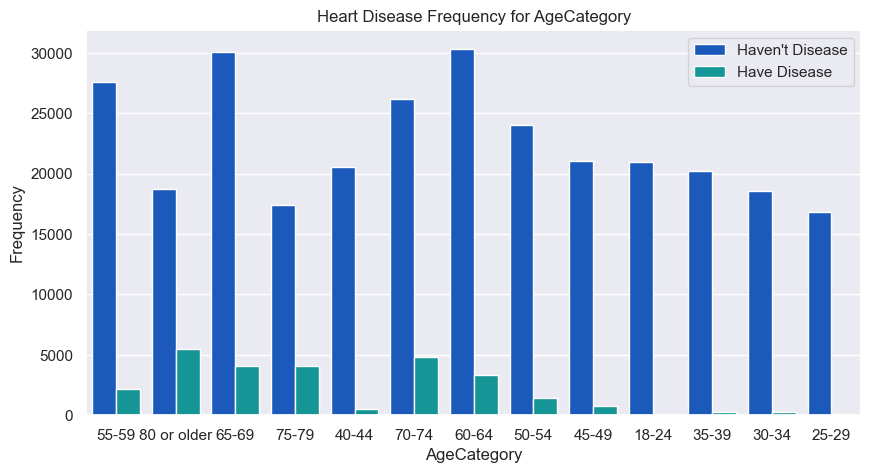

In [47]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', data=data, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [108]:
#the count of people Smoking
data['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [51]:
data.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  Smoking  HeartDisease
Female  18-24        No       No              8252
                              Yes               40
                     Yes      No              1132
                              Yes               10
        25-29        No       No              5918
                                              ... 
Male    75-79        Yes      Yes             1563
        80 or older  No       No              3007
                              Yes             1092
                     Yes      No              3609
                              Yes             1729
Name: HeartDisease, Length: 104, dtype: int64

Text(0.5, 0, 'Smoking')

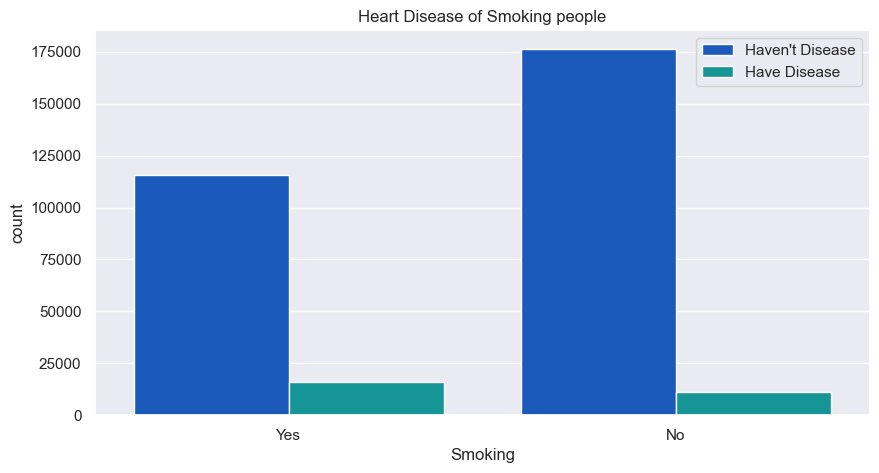

In [52]:
#show Heart Disease Frequency for Smoking
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=data,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')

In [69]:
# I want to Know how many people drink the AlcoholDrinking or not 
data['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [70]:
data.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              271786
                 Yes              26232
Yes              No               20636
                 Yes               1141
Name: HeartDisease, dtype: int64

In [71]:
data.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

Sex     AgeCategory  AlcoholDrinking  PhysicalActivity  HeartDisease
Female  18-24        No               No                No              1427
                                                        Yes                9
                                      Yes               No              7222
                                                        Yes               38
                     Yes              No                No                66
                                                                        ... 
Male    80 or older  No               Yes               Yes             1791
                     Yes              No                No                59
                                                        Yes               34
                                      Yes               No               128
                                                        Yes               41
Name: HeartDisease, Length: 208, dtype: int64

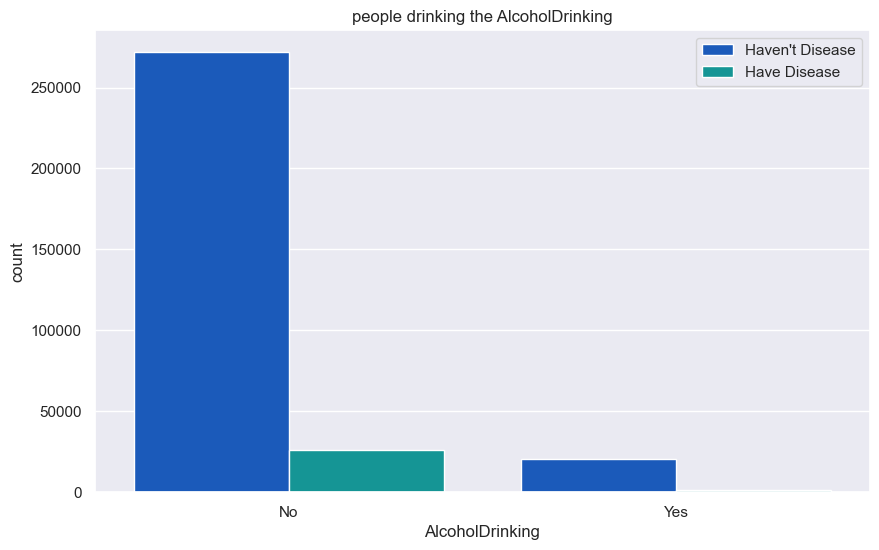

In [87]:
#Show how many people drink the AlcoholDrinking or not 
plt.figure(figsize=(10,6))
sns.countplot(x=data['AlcoholDrinking'],data=data , hue='HeartDisease',palette='winter')
plt.title('people drinking the AlcoholDrinking')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('AlcoholDrinking')
plt.show()

In [89]:
#I want to know how many people have KidneyDisease
data['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [112]:
#show the peolple who have KidneyDisease and HeartDisease
data.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

KidneyDisease  HeartDisease
No             No              284098
               Yes              23918
Yes            No                8324
               Yes               3455
Name: HeartDisease, dtype: int64

In [113]:
data.groupby(['Sex','KidneyDisease','HeartDisease'])['HeartDisease'].count()

Sex     KidneyDisease  HeartDisease
Female  No             No              151743
                       Yes               9608
        Yes            No                4828
                       Yes               1626
Male    No             No              132355
                       Yes              14310
        Yes            No                3496
                       Yes               1829
Name: HeartDisease, dtype: int64

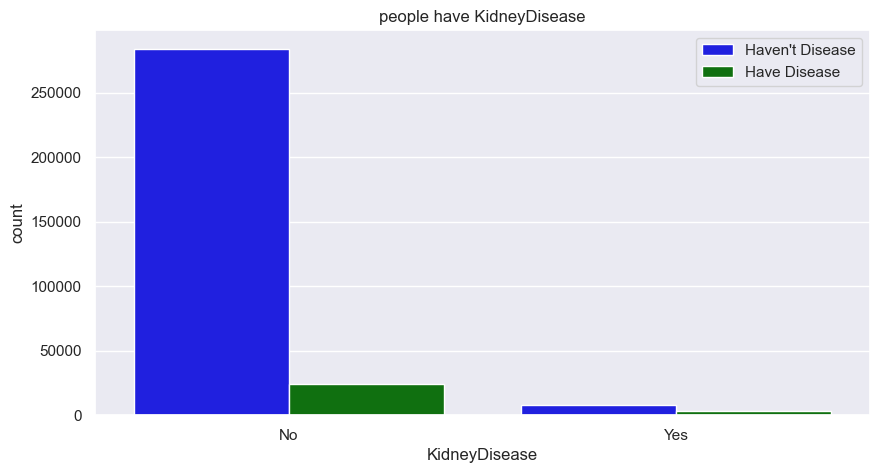

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(data=data , x = 'KidneyDisease',hue='HeartDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])

In [107]:
data.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

Sex     KidneyDisease
Female  No               161351
        Yes                6454
Male    No               146665
        Yes                5325
Name: KidneyDisease, dtype: int64

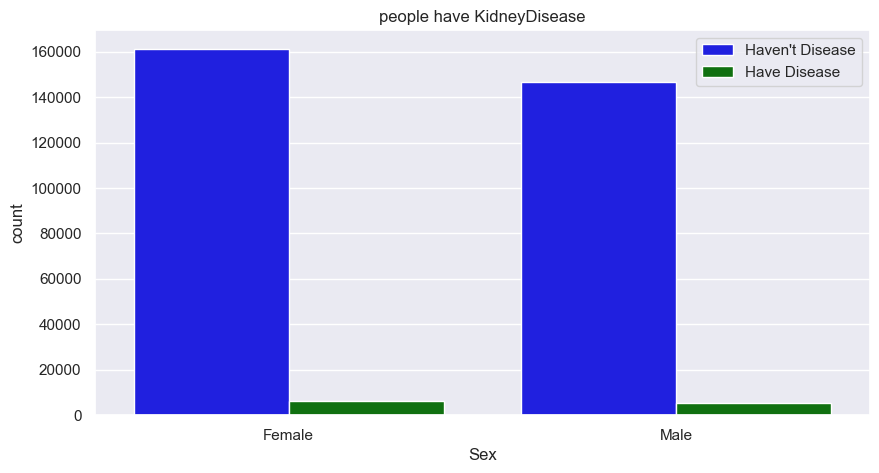

In [105]:
plt.figure(figsize=(10,5))
sns.countplot(data=data , x = 'Sex',hue='KidneyDisease',palette=['blue','green'])
plt.title('people have KidneyDisease')
plt.legend(["Haven't Disease", "Have Disease"])

In [117]:
#Show the SkinCancer  
data['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [122]:
#Show people have SkinCancer
data.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

Sex     SkinCancer
Female  No            152782
        Yes            15023
Male    No            137194
        Yes            14796
Name: SkinCancer, dtype: int64

Text(0.5, 1.0, 'people have SkinCancer')

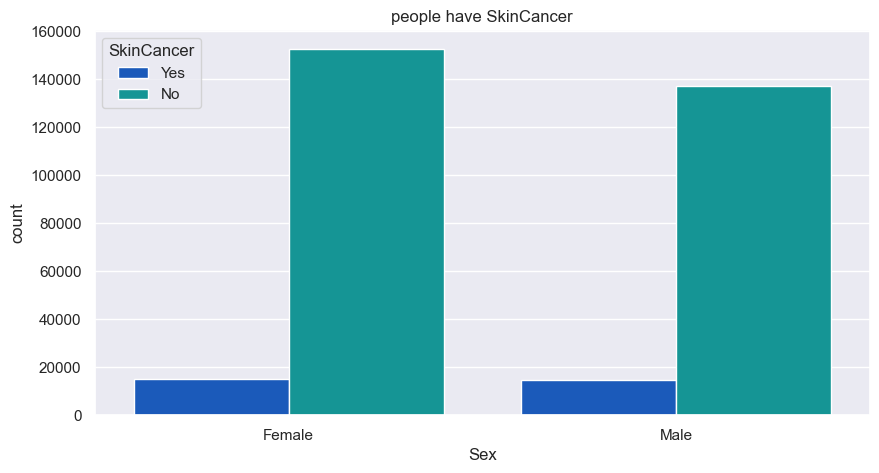

In [131]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=data, hue='SkinCancer',palette='winter')
plt.title('people have SkinCancer')


In [121]:
data.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

Sex     SkinCancer  HeartDisease
Female  No          No              143226
                    Yes               9556
        Yes         No               13345
                    Yes               1678
Male    No          No              124357
                    Yes              12837
        Yes         No               11494
                    Yes               3302
Name: HeartDisease, dtype: int64

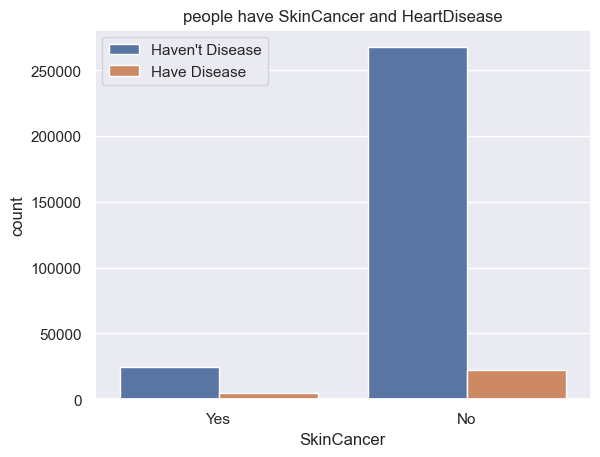

In [128]:
sns.countplot(x = 'SkinCancer', data=data , hue = 'HeartDisease')
plt.title('people have SkinCancer and HeartDisease')
plt.legend(["Haven't Disease", "Have Disease"])

## Check the Distribution and skewness of the features 

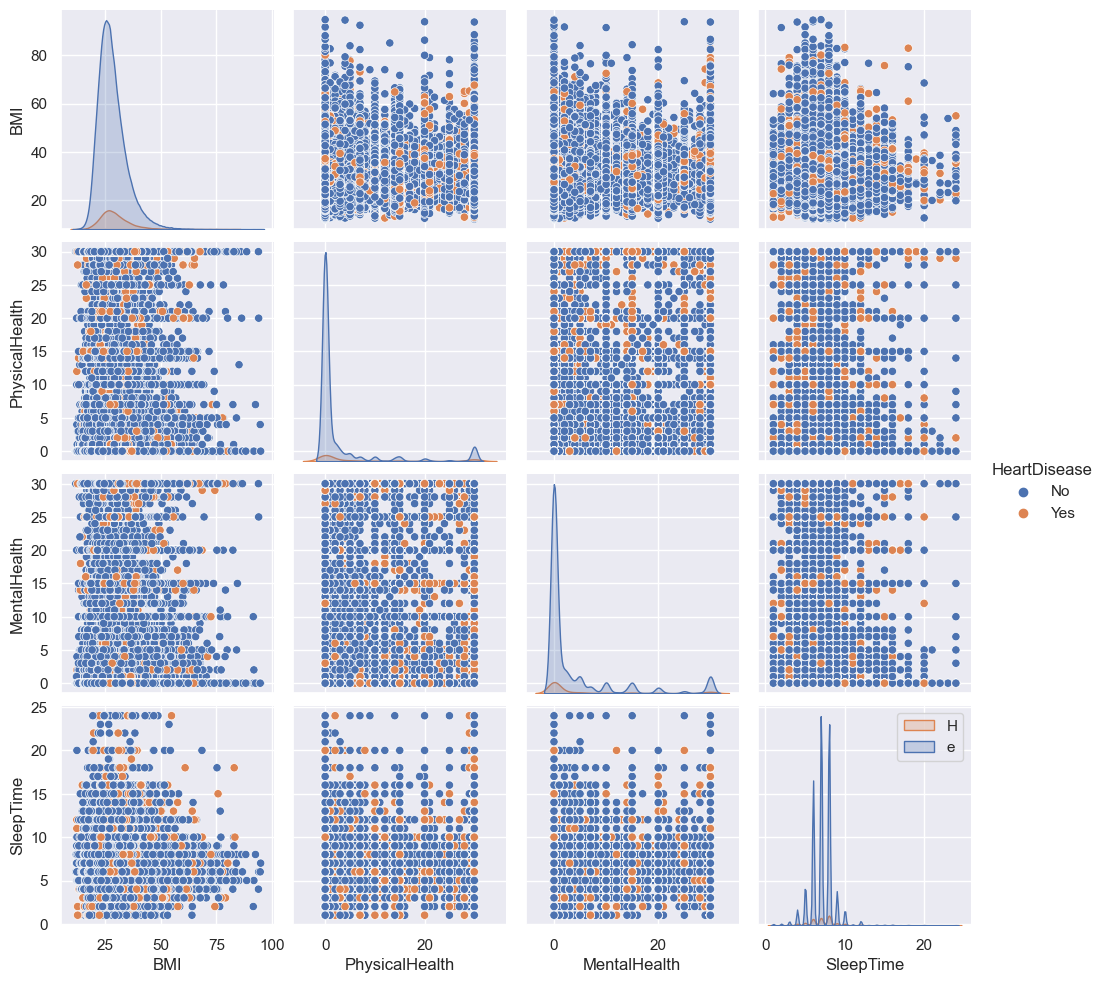

In [130]:
sns.pairplot(data = data , hue= 'HeartDisease')
plt.legend('HeartDisease')